In [ ]:
pip install tensorflow

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
#from tf.keras.datsets import mnist
from keras.utils import np_utils
from sklearn.metrics import classification_report
from keras.preprocessing.image import img_to_array
from sklearn.metrics import confusion_matrix
import sklearn
import tensorflow as tf
import numpy as np
import pandas as pd
import random

#Data Processing

In [ ]:
#Loading MNIST Data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

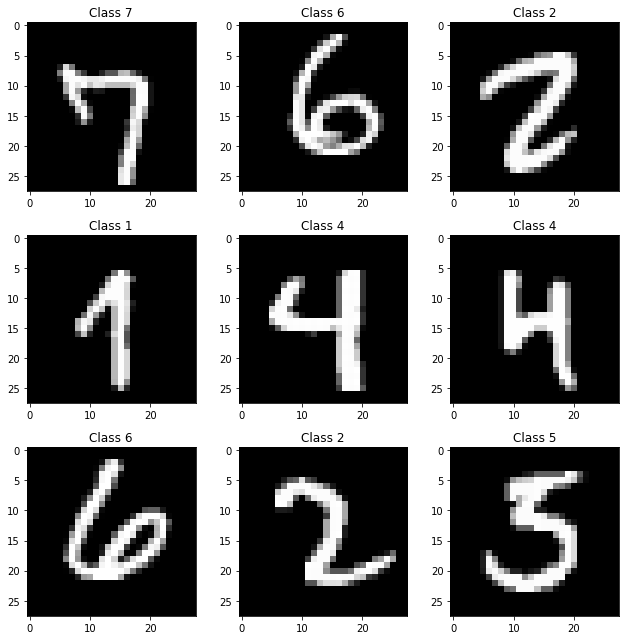

In [ ]:
#Displaying a few of the MNIST images
plt.rcParams['figure.figsize'] = (9,9) # Increases the size of the images

#To show 9 images
for i in range(9):
    plt.subplot(3,3,i+1)
    num = random.randint(0, len(X_train))
    plt.imshow(X_train[num], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[num])) #Title of each image would be the number itself
    
plt.tight_layout()

In [ ]:
#Function to print the pixel values
def matprint(mat, fmt="g"):
    col_maxes = [max([len(("{:"+fmt+"}").format(x)) for x in col]) for col in mat.T]
    for x in mat:
        for i, y in enumerate(x):
            print(("{:"+str(col_maxes[i])+fmt+"}").format(y), end="  ")
        print("")

# now print!        
matprint(X_train[0])

0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  
0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  
0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  
0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  
0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  
0  0  0  0    0    0    0    0    0    0    0    0    3   18   18   18  126  136  175   26  166  255  247  127  0  0  0  0  
0  0  0  0    0    0    0    0   30   36   94  154  170  253  253  253  253  253  225  172  253  242  195   64  0  0  0  0  
0  0  0  0    0    0    0   49  238  253  253  253  253  253  253  253  253  251   93   82   82   56   39    0  0  0  0  0  


In [ ]:
print("Max pixel value = ", X_train.max())
print("Min pixel value = ", X_train.min())

Max pixel value =  255
Min pixel value =  0


The images in MNIST are grayscale ie only black and white, 0 - black, 255 - white. 

We would have to unroll the height x width of the matrix, so in MNIST each image is of 28x28 pixels. Hence the input vector that contains the values of these pixels would be unrolled to 28*28 = 784 pixels. 

We can visualise the distribution of these pixels using matplotlib as follows:

Text(0.5, 1.0, 'Pixel Value Distribution')

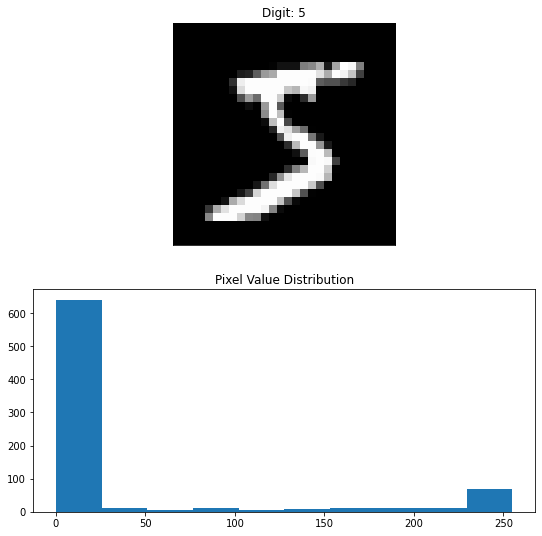

In [ ]:
#Visualising the distribution of the pixels
fig = plt.figure()

#Defining the layout
plt.subplot(2,1,1)

#Displaying the Image and Getting its corresponding label
plt.imshow(X_train[0], cmap='gray', interpolation='none')
plt.title("Digit: {}".format(y_train[0]))

plt.xticks([])
plt.yticks([])
plt.subplot(2,1,2)

#PLot a Histogram showing the distribution of the values of the pixels
plt.hist(X_train[0].reshape(784))
plt.title("Pixel Value Distribution")

#Normalising the Data

Normalising the data values so that training happens faster as the range is between 0 and 1
It also ensures that the range is not so large which might give rise to unstable gradients.
This reduces the chance of the local optima problem - where the SGD algorithm misidentifies a point that is lower than the surrounding points as the lowest point in the function, when it actually is not.


In [ ]:
#Printing the shape of the train and test sets before normalising
print("X_train shape = ", X_train.shape)
print("X_test shape = ", X_test.shape)
print("y_train shape = ", y_train.shape)
print("y_test shape = ", y_test.shape)

X_train shape =  (60000, 28, 28)
X_test shape =  (10000, 28, 28)
y_train shape =  (60000,)
y_test shape =  (10000,)


In [ ]:
#Building the input vector
#MNIST has 60000 images in the train set and 10000 images in the test set, therefore total 70000
X_train = X_train.reshape(60000, 784) 
X_test = X_test.reshape(10000, 784)

In [ ]:
#Converting them to floating points
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [ ]:
#Normalizing the data by diving by 255
X_train = X_train / 255
X_test = X_test / 255

In [ ]:
#Printing the final input shape ready for training
print("X_train shape = ", X_train.shape)
print("X_test shape = ", X_test.shape)

X_train shape =  (60000, 784)
X_test shape =  (10000, 784)


#One-Hot Encoding

The labels in y_train are still in the form of integers. One-Hot Encoding results in labels that are returned are encoded as vectors of integers. 

The number of classes/categories = The Length of the vectors



In [ ]:
print(np.unique(y_train, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))


In [ ]:
#Print the shape before One-Hot Encoding
print("y_train shape = ", y_train.shape)

y_train shape =  (60000,)


In [ ]:
#Number of classes from 0-9 = 10
n = 10

#One-Hot Encoding
Y_train = np_utils.to_categorical(y_train, n)
Y_test = np_utils.to_categorical(y_test, n)

In [ ]:
#Printing the shape after One-Hot Encoding
print("Y_train shape = ", Y_train.shape)

Y_train shape =  (60000, 10)


#Building the Network

Start by having a stack of layers - Sequential 
Then adding the layers

In [ ]:
#Stack of layers
model = tf.keras.models.Sequential()

#Adding the layers
#Both the Hidden Layers would have a dropout of 0.2 - fraction of the inputs to drop, this would help in preventing overfitting
#1st Hidden Layer Would have 512 neurons in this layer and is connected to the input layer with input_shape 784
model.add(tf.keras.layers.Dense(512, input_shape=(784,), activation = "relu"))
tf.keras.layers.Dropout(0.2) 
                         
#2nd Hidden Layer
model.add(tf.keras.layers.Dense(512, activation = "relu"))
tf.keras.layers.Dropout(0.2)

#Output Layer
model.add(tf.keras.layers.Dense(10, activation = "softmax"))

#Compiling the Model

Optimizer, metrics and loss are chosen.

Precision - the fraction of relevant instances among the retrieved instances

Recall - the fraction of relevant instances that were retrieved.

In [ ]:
#The loss is chosen as the cataegorical_crossentropy as we have more than 2 classes and our labels are one-hot encoded.
#Optimizer Adam with the default settings has been chosen. 
#Metrics
model.compile(loss='categorical_crossentropy', metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()], optimizer='adam')

#Training the Model


In [ ]:
#Training and saving the metrics in history
#Usually the bigger the batch size, the faster the process but there might be GPU Limitations and there is a possibility of the quality of the model degrading, therefore limit to 128
#The number of iterations/data passes to the network is kept at 20.
history = model.fit(X_train, Y_train,
          batch_size=128, epochs=20,
          verbose=2,
          validation_data=(X_test, Y_test))

Epoch 1/20
469/469 - 6s - loss: 0.2133 - accuracy: 0.9374 - precision_1: 0.9581 - recall_1: 0.9173 - val_loss: 0.0995 - val_accuracy: 0.9690 - val_precision_1: 0.9752 - val_recall_1: 0.9632
Epoch 2/20
469/469 - 5s - loss: 0.0786 - accuracy: 0.9753 - precision_1: 0.9787 - recall_1: 0.9725 - val_loss: 0.0847 - val_accuracy: 0.9730 - val_precision_1: 0.9756 - val_recall_1: 0.9699
Epoch 3/20
469/469 - 5s - loss: 0.0486 - accuracy: 0.9847 - precision_1: 0.9865 - recall_1: 0.9832 - val_loss: 0.0744 - val_accuracy: 0.9752 - val_precision_1: 0.9787 - val_recall_1: 0.9731
Epoch 4/20
469/469 - 5s - loss: 0.0346 - accuracy: 0.9883 - precision_1: 0.9895 - recall_1: 0.9875 - val_loss: 0.0756 - val_accuracy: 0.9774 - val_precision_1: 0.9787 - val_recall_1: 0.9760
Epoch 5/20
469/469 - 5s - loss: 0.0259 - accuracy: 0.9913 - precision_1: 0.9922 - recall_1: 0.9906 - val_loss: 0.0727 - val_accuracy: 0.9799 - val_precision_1: 0.9816 - val_recall_1: 0.9792
Epoch 6/20
469/469 - 5s - loss: 0.0216 - accuracy:

#Evaluating the Model

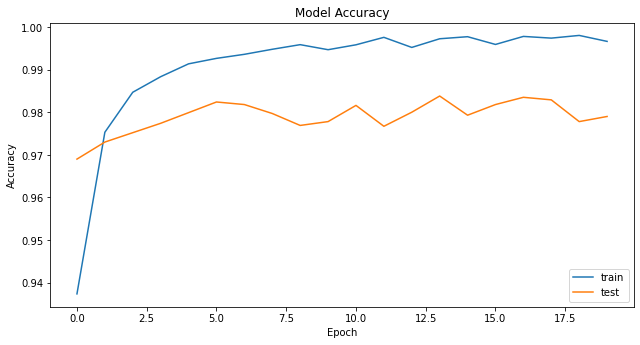

In [ ]:
#Plotting Model Accuracy
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.tight_layout()


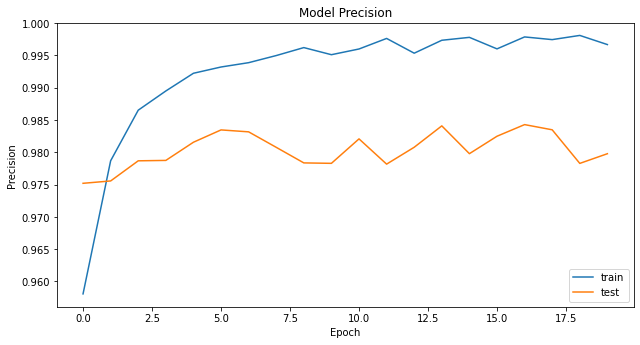

In [ ]:
#Plotting Model Precision
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['precision_1'])
plt.plot(history.history['val_precision_1'])
plt.title('Model Precision')
plt.ylabel('Precision')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.tight_layout()

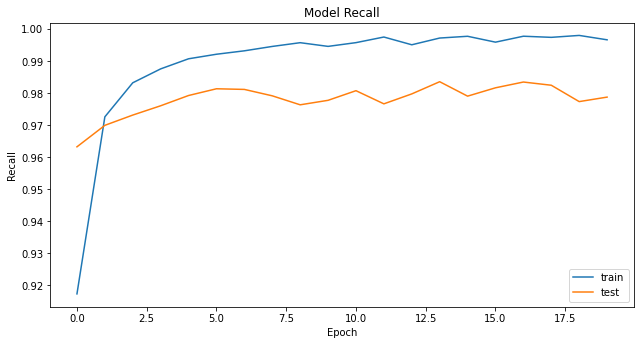

In [ ]:
#Plotting Model Recall
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['recall_1'])
plt.plot(history.history['val_recall_1'])
plt.title('Model Recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.tight_layout()

In [ ]:
loss_and_metrics = model.evaluate(X_test, Y_test, verbose=2)

print("Test Loss: ", loss_and_metrics[0])
print("Test Accuracy: ", loss_and_metrics[1])
print("Test Precision: ", loss_and_metrics[2])
print("Test Recall: ", loss_and_metrics[3])

313/313 - 1s - loss: 0.0972 - accuracy: 0.9790 - precision_1: 0.9798 - recall_1: 0.9787
Test Loss:  0.09717152267694473
Test Accuracy:  0.9789999723434448
Test Precision:  0.9797777533531189
Test Recall:  0.9786999821662903


In [ ]:
#Predictions
predicted_classes = model.predict_classes(X_test)
predicted_classes

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([7, 2, 1, ..., 4, 5, 6])


9790  classified correctly
210  classified incorrectly
Correct Predictions


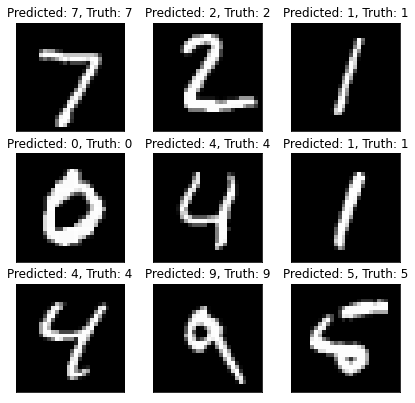

In [ ]:
#To see which we predicted correctly
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]
print()
print(len(correct_indices)," classified correctly")
print(len(incorrect_indices)," classified incorrectly")

# adapt figure size to accomodate 18 subplots
plt.rcParams['figure.figsize'] = (7,14)

figure_evaluation = plt.figure()

print("Correct Predictions")
# plot 9 correct predictions
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(6,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(
      "Predicted: {}, Truth: {}".format(predicted_classes[correct],
                                        y_test[correct]))
    plt.xticks([])
    plt.yticks([])

Incorrect Predictions


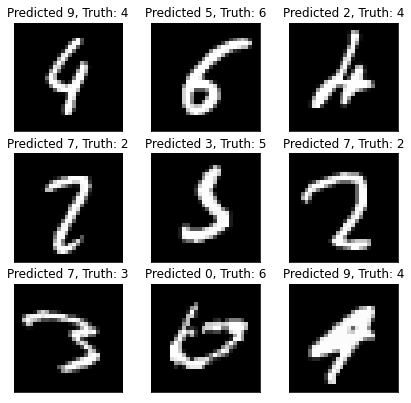

In [ ]:
# plot 9 incorrect predictions
print("Incorrect Predictions")
figure_evaluation = plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(6,3,i+10)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(
      "Predicted {}, Truth: {}".format(predicted_classes[incorrect], 
                                       y_test[incorrect]))
    plt.xticks([])
    plt.yticks([])